In [1]:
pip install pretrainedmodels

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=66652033cb0377a648a19acf1dc0d5054543d03b20260bc32c05ba1608d35233
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [2]:
pip install utils

In [3]:
from torchvision.models import *
import pretrainedmodels

from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai

from utils import *
import sys
import torch
fastai.__version__

'1.0.60'

In [0]:
from pathlib import Path

from fastai.callbacks.hooks import *

In [0]:
pip install utils

In [0]:


torch.__version__



'1.4.0'

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 934462453e311ea.zip to 934462453e311ea.zip


In [0]:
from google.colab import files
#uploaded = files.upload()

# New Section

In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['934462453e311ea.zip']), 'r')
data.extractall()

In [0]:
path = 'dataset'
train_data_dir = 'dataset/Train Images' 
test_data_dir = 'dataset/Test Images' 

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('dataset/train.csv')

In [0]:
test =  pd.read_csv('dataset/test.csv')

In [0]:
df.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [0]:
df2 = df

In [0]:
df2.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [0]:
df2['Class'].value_counts()

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64

In [0]:
df2['Class'] = df2['Class'].apply({'Attire':1,'Decorationandsignage':2,'Food':3,'misc':4}.get)
print(df2)

               Image  Class
0      image7042.jpg      3
1      image3327.jpg      4
2     image10335.jpg      1
3      image8019.jpg      3
4      image2128.jpg      1
...              ...    ...
5978   image2494.jpg      3
5979   image8015.jpg      1
5980   image4975.jpg      3
5981   image1222.jpg      3
5982   image9635.jpg      1

[5983 rows x 2 columns]


In [0]:
df2['Class'].value_counts()

3    2278
1    1691
4    1271
2     743
Name: Class, dtype: int64

In [0]:
#10-03-2020

In [0]:
from PIL import Image

In [13]:
df.head(),test.head()

(            Image   Class
 0   image7042.jpg    Food
 1   image3327.jpg    misc
 2  image10335.jpg  Attire
 3   image8019.jpg    Food
 4   image2128.jpg  Attire,             Image
 0   image6245.jpg
 1  image10409.jpg
 2   image8692.jpg
 3  image10517.jpg
 4   image2580.jpg)

In [0]:
df2 = pd.read_csv('dataset/train.csv')

In [35]:
df2.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [36]:
df2['Class'] = df2['Class'].apply({'Attire':1,'Decorationandsignage':2,'Food':3,'misc':4}.get)
print(df2)

               Image  Class
0      image7042.jpg      3
1      image3327.jpg      4
2     image10335.jpg      1
3      image8019.jpg      3
4      image2128.jpg      1
...              ...    ...
5978   image2494.jpg      3
5979   image8015.jpg      1
5980   image4975.jpg      3
5981   image1222.jpg      3
5982   image9635.jpg      1

[5983 rows x 2 columns]


In [37]:
train_images=np.array(df.iloc[:,0])
train_images

array(['image7042.jpg', 'image3327.jpg', 'image10335.jpg', 'image8019.jpg', ..., 'image8015.jpg', 'image4975.jpg',
       'image1222.jpg', 'image9635.jpg'], dtype=object)

In [0]:
train_data_dir ='dataset/Train Images/'

In [0]:
train_images=np.array(df2.iloc[:,0])
imagearr=[]
for i in train_images:
    img=Image.open(train_data_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [60]:
imagearr[0]

array([[48, 48, 49, 51, ..., 51, 49, 48, 48],
       [50, 50, 51, 53, ..., 52, 50, 49, 49],
       [53, 53, 54, 56, ..., 55, 53, 52, 51],
       [56, 56, 58, 59, ..., 56, 54, 53, 53],
       ...,
       [24, 24, 24, 24, ..., 20, 20, 19, 19],
       [23, 23, 23, 23, ..., 19, 20, 19, 19],
       [23, 23, 23, 23, ..., 19, 19, 18, 18],
       [22, 22, 22, 22, ..., 19, 18, 17, 17]], dtype=uint8)

(5983, 150, 150, 1)


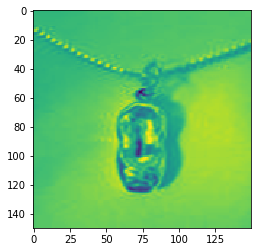

In [62]:
trainImages = np.array([i for i in imagearr]).reshape(-1,150, 150, 1)
print(trainImages.shape)
plt.imshow(np.asarray(imagearr)[4])


In [0]:
img_dir='dataset/Test Images/'
test_images=np.array(test.iloc[:,0])
imagearr=[]
for i in test_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [64]:
# np.asarray(imagearr)
testImages = np.array([i for i in imagearr]).reshape(-1,150, 150, 1)
print(testImages.shape)



(3219, 150, 150, 1)


In [65]:
df2['Class'].values

array([3, 4, 1, 3, ..., 1, 3, 3, 1])

In [0]:
trainLabels = df2['Class'].values
from keras.utils import np_utils
trainLabels.shape
trainLabels = np_utils.to_categorical(trainLabels)model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])



In [67]:
trainLabelsmodel.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [0]:


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))




In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 73, 73, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 70, 70, 64)        32832     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 35, 35, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 128)      

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])


In [79]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 100, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
5983/5983 [==============================] - 15s 2ms/step - loss: 1.3322 - acc: 0.3988
Epoch 2/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.2203 - acc: 0.4560
Epoch 3/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.1383 - acc: 0.4964
Epoch 4/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.0801 - acc: 0.5325
Epoch 5/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.0294 - acc: 0.5679
Epoch 6/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.9583 - acc: 0.6064
Epoch 7/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.8913 - acc: 0.6386
Epoch 8/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.8105 - acc: 0.6747
Epoch 9/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.7070 - acc: 0.7197
Epoch 10/100


In [80]:
predictions = model.predict_classes(testImages)
predictions

array([3, 3, 3, 3, ..., 4, 1, 2, 4])

In [81]:
predictions

array([3, 3, 3, 3, ..., 4, 1, 2, 4])

In [82]:
test['Class']=predictions
test.head()

,Image,Class
0,image6245.jpg,3
1,image10409.jpg,3
2,image8692.jpg,3
3,image10517.jpg,3
4,image2580.jpg,1


In [83]:
test['Class'] = test['Class'].apply({1:'Attire',2:'Decorationandsignage',3:'Food',4:'misc'}.get)
print(test)

               Image                 Class
0      image6245.jpg                  Food
1     image10409.jpg                  Food
2      image8692.jpg                  Food
3     image10517.jpg                  Food
4      image2580.jpg                Attire
...              ...                   ...
3214   image4968.jpg                Attire
3215   image6673.jpg                  misc
3216   image3442.jpg                Attire
3217   image8178.jpg  Decorationandsignage
3218   image5367.jpg                  misc

[3219 rows x 2 columns]


In [0]:

test.to_csv('submission1.csv', index=False)

In [85]:
test['Class'].value_counts()

Attire                  1139
Food                    1133
misc                     529
Decorationandsignage     418
Name: Class, dtype: int64